In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [2]:
sns.set_theme()

# Размер выборки

$$n > \dfrac{\left[ \Phi^{-1} \Bigl( 1-\dfrac{\alpha}{2} \Bigr) + \Phi^{-1} \Bigl( 1-\beta \Bigr) \right]^2 (\sigma_X^2 + \sigma_Y^2)}{\varepsilon^2}$$

где:

$\Phi^{-1}(x)$ - значения стандартного нормального распределения, соответствующее x

$\sigma$ - стандартное отклонение нашей выборки.

In [3]:
def get_sample_size_abs(epsilon, std, alpha=0.05, beta=0.2):
    t_alpha = norm.ppf(1 - alpha/2, loc = 0, scale = 1)
    t_beta = norm.ppf(1 - beta, loc = 0, scale = 1)
    z_scores_sum_squared = (t_alpha + t_beta) ** 2
    sample_size = int(
        np.ceil(
             z_scores_sum_squared * (2 * std ** 2) / (epsilon ** 2)
        )
    )
    return sample_size

def get_sample_size_arb(mu, std, eff=1.01, alpha=0.05, beta=0.2):
    epsilon = (eff - 1) * mu
    return get_sample_size_abs(epsilon, std, alpha, beta)

In [4]:
def plot_pvalue_ecdf(p_values, title = None, vline = None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if title:
            plt.suptitle(title)

    sns.histplot(p_values, ax=ax1, bins=20, stat='density')
    ax1.plot([0,1],[1,1], 'k--')
    ax1.set(xlabel='p-value', ylabel='Density')

    sns.ecdfplot(p_values, ax=ax2)
    ax2.plot([0,1],[0,1], 'k--')
    ax2.set(xlabel='p-value', ylabel='Probability')

    if vline is not None:
        ax2.axvline(vline, color='red', linestyle='--', linewidth=1, label=f'α = {vline}')
        
        ecdf_value = np.mean(np.array(p_values) <= vline)
        
        ax2.axhline(ecdf_value, color='green', linestyle='--', linewidth=1, 
                    label=f'ECDF = {ecdf_value:.3f}')
        
        ax2.legend()
    
    plt.tight_layout()

# Одинаковые размеры групп и одинакавая дисперсия

## Контроль ошибки I рода

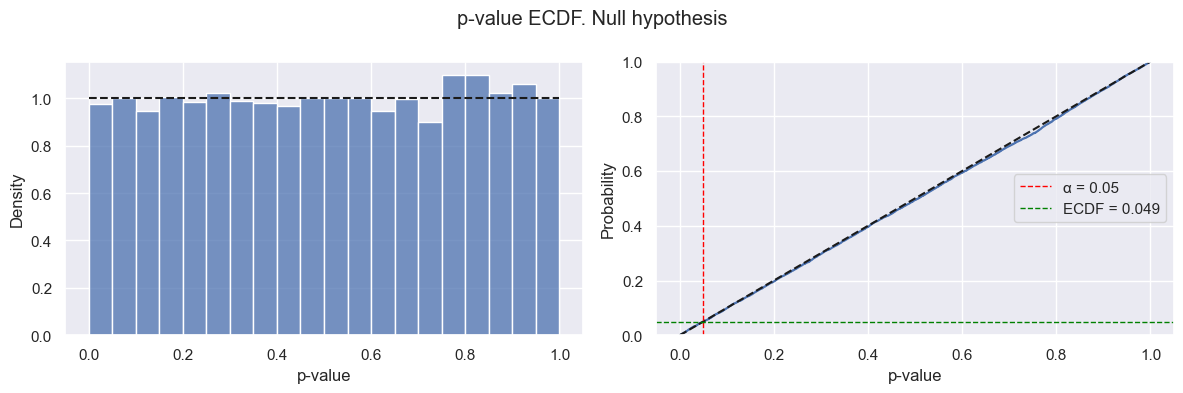

In [5]:
mu = 5
std = 1
mde = 0.05
eff = 1 + mde/mu
sample_size = get_sample_size_arb(mu, std, eff)

p_values = []
for i in range(10000):
    a = np.random.normal(mu, std, sample_size)
    b = np.random.normal(mu, std, sample_size)
    _, p_val = ttest_ind(a, b)
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, 'p-value ECDF. Null hypothesis', 0.05)

## Контроль ошибки II рода

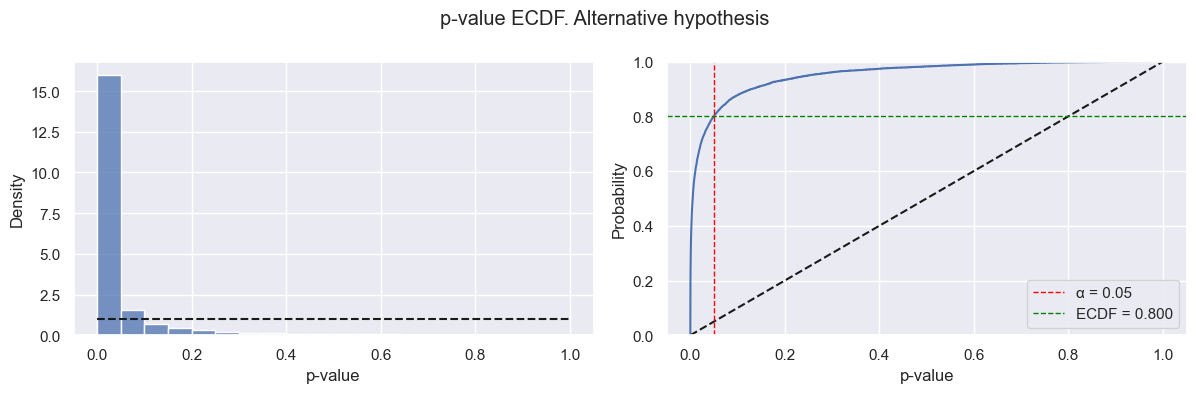

In [6]:
mu = 5
std = 1
mde = 0.05
eff = 1 + mde/mu
sample_size = get_sample_size_arb(mu, std, eff)

p_values = []
for i in range(10000):
    a = np.random.normal(mu, std, sample_size)
    b = np.random.normal(mu, std, sample_size) + mde
    _, p_val = ttest_ind(a, b)
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, 'p-value ECDF. Alternative hypothesis', 0.05)

# Зависимые данные

## Контроль ошибки I рода

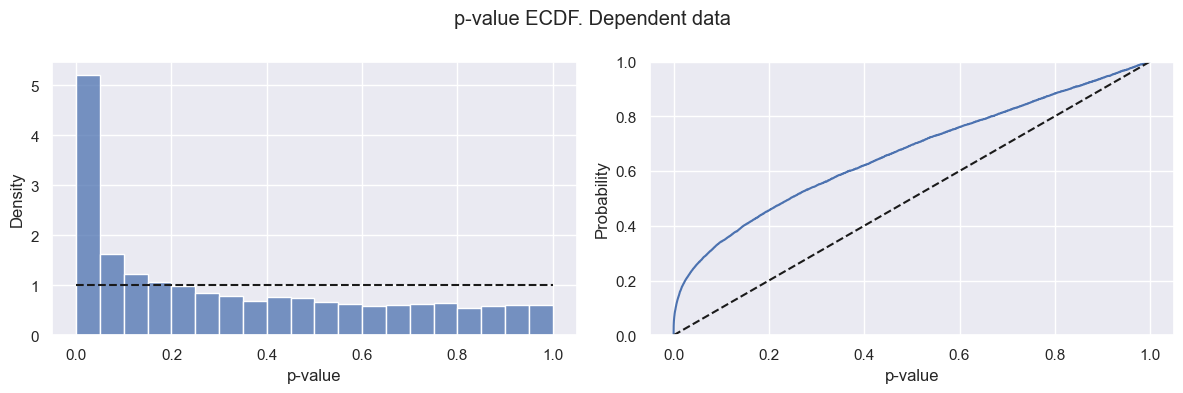

In [7]:
mu = 5
std = 1
mde = 0.05
eff = 1 + mde/mu
sample_size = get_sample_size_arb(mu, std, eff)
replication_factor = 3
p_values = []
for i in range(10000):
    a_ = np.random.normal(mu, std, sample_size)
    b_ = np.random.normal(mu, std, sample_size)
    a = np.concatenate([a_] * replication_factor)
    b = np.concatenate([b_] * replication_factor)

    _, p_val = ttest_ind(a, b)
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, 'p-value ECDF. Dependent data')

# Разные дисперсии

In [8]:
def get_sample_size_abs_2(epsilon, std_1, std_2, alpha=0.05, beta=0.2):
    t_alpha = norm.ppf(1 - alpha/2, loc = 0, scale = 1)
    t_beta = norm.ppf(1 - beta, loc = 0, scale = 1)
    z_scores_sum_squared = (t_alpha + t_beta) ** 2
    sample_size = int(
        np.ceil(
             z_scores_sum_squared * (std_1 ** 2 + std_2 ** 2) / (epsilon ** 2)
        )
    )
    return sample_size

def get_sample_size_arb_2(mu, std_1, std_2, eff=1.01, alpha=0.05, beta=0.2):
    epsilon = (eff - 1) * mu
    return get_sample_size_abs_2(epsilon, std_1, std_2, alpha, beta)

## Контроль ошибки I рода

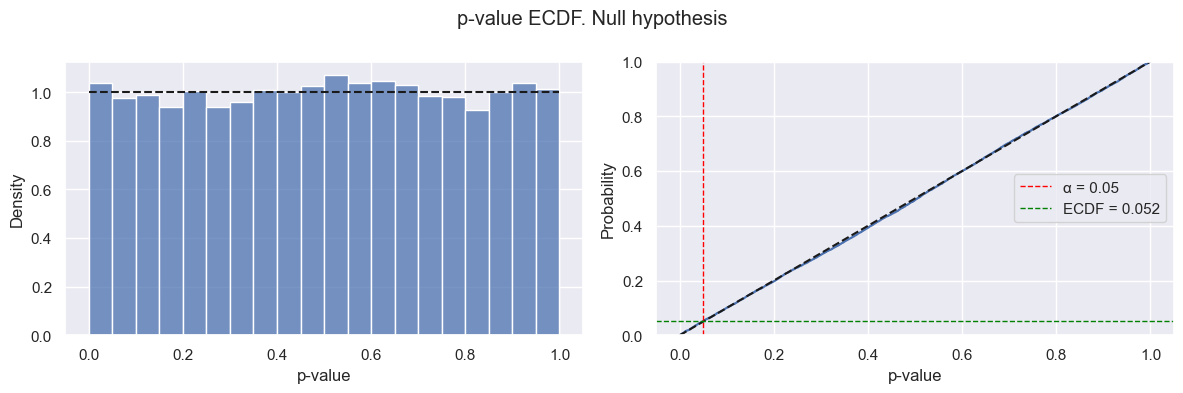

In [9]:
mu = 5
std_1 = 1
std_2 = 2
mde = 0.05
eff = 1 + mde/mu
sample_size = get_sample_size_arb_2(mu, std_1, std_2, eff)

p_values = []
for i in range(10000):
    a = np.random.normal(mu, std_1, sample_size)
    b = np.random.normal(mu, std_2, sample_size)
    _, p_val = ttest_ind(a, b)
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, 'p-value ECDF. Null hypothesis', 0.05)

## Контроль ошибки II рода

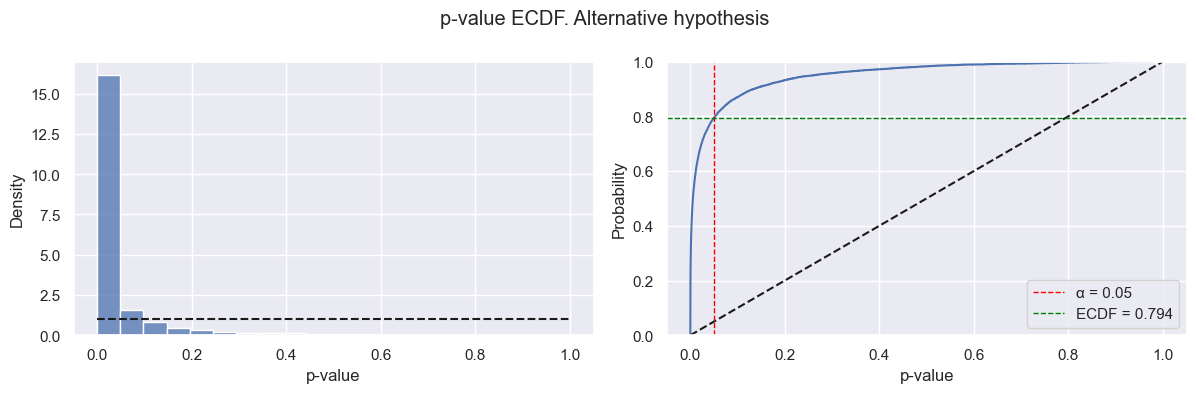

In [10]:
mu = 5
std_1 = 1
std_2 = 2
mde = 0.05
eff = 1 + mde/mu
sample_size = get_sample_size_arb_2(mu, std_1, std_2, eff)

p_values = []
for i in range(10000):
    a = np.random.normal(mu, std_1, sample_size)
    b = np.random.normal(mu, std_2, sample_size) + mde
    _, p_val = ttest_ind(a, b)
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, 'p-value ECDF. Alternative hypothesis', 0.05)

# Разные дисперсии и разные размеры групп

## Контроль ошибки I рода

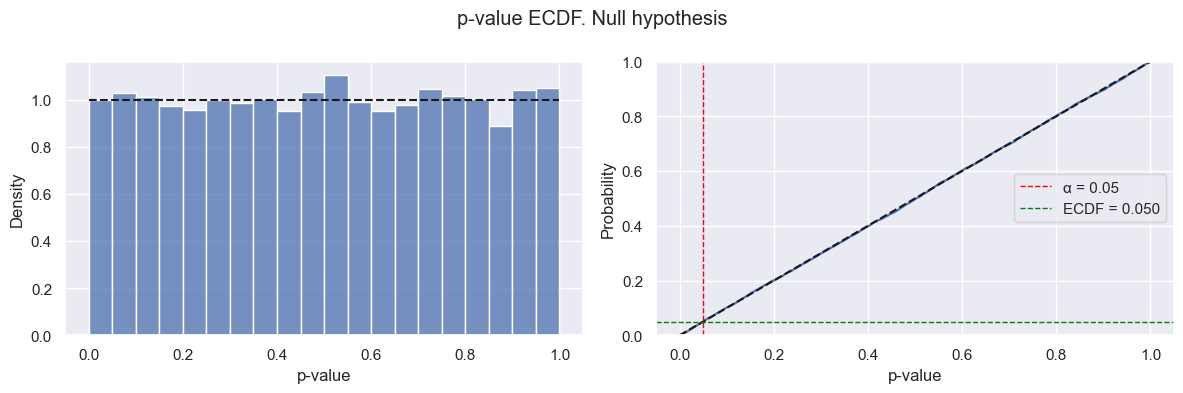

In [11]:
mu = 5
std_1 = 1
std_2 = 2
mde = 0.05
eff = 1 + mde/mu
sample_size = get_sample_size_arb_2(mu, std_1, std_2, eff)

p_values = []
for i in range(10000):
    a = np.random.normal(mu, std_1, sample_size)
    b = np.random.normal(mu, std_2, int(sample_size*1.5))
    _, p_val = ttest_ind(a, b, equal_var=False)
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, 'p-value ECDF. Null hypothesis', 0.05)

## Контроль ошибки II рода

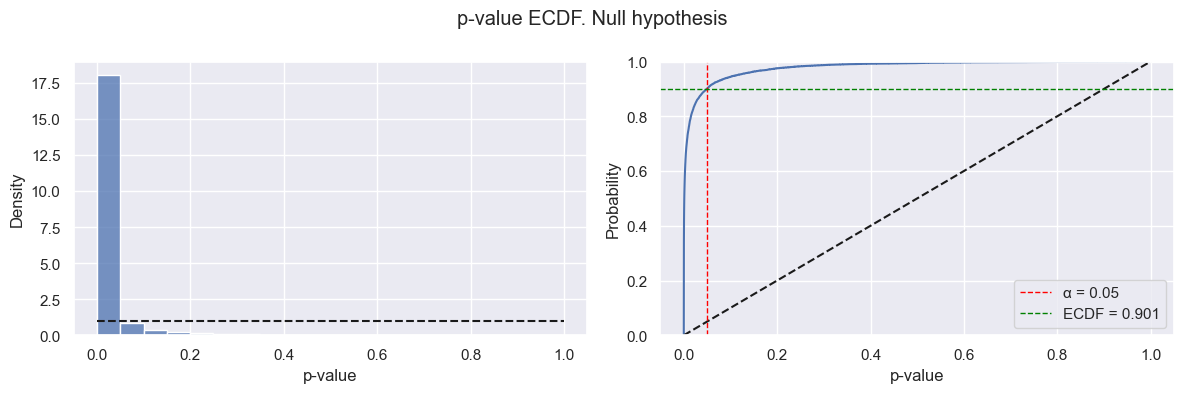

In [12]:
mu = 5
std_1 = 1
std_2 = 2
mde = 0.05
eff = 1 + mde/mu
sample_size = get_sample_size_arb_2(mu, std_1, std_2, eff)

p_values = []
for i in range(10000):
    a = np.random.normal(mu, std_1, sample_size)
    b = np.random.normal(mu, std_2, int(sample_size*1.5)) + mde
    _, p_val = ttest_ind(a, b, equal_var=False)
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, 'p-value ECDF. Null hypothesis', 0.05)

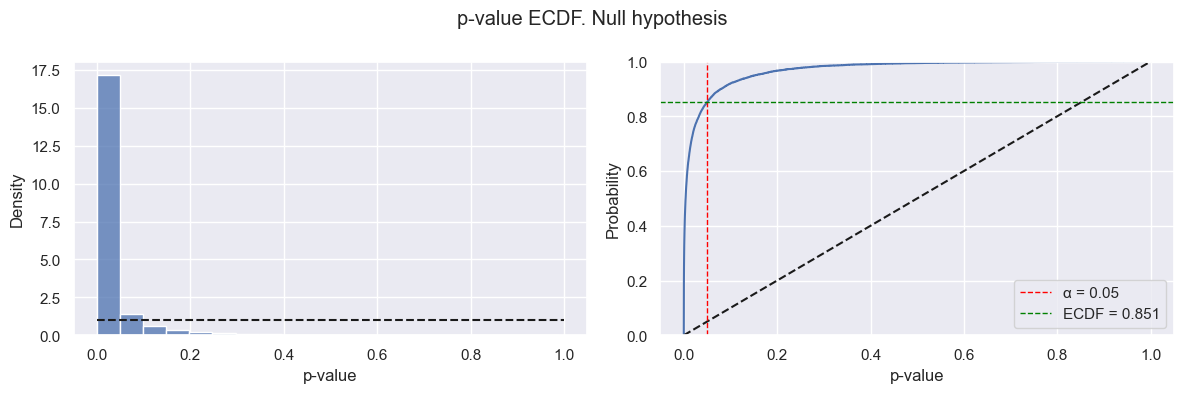

In [13]:
mu = 5
std_1 = 1
std_2 = 2
mde = 0.05
eff = 1 + mde/mu
sample_size = get_sample_size_arb_2(mu, std_1, std_2, eff)

p_values = []
for i in range(10000):
    a = np.random.normal(mu, std_1, sample_size)
    b = np.random.normal(mu, std_2, int(sample_size*1.5)) + mde
    _, p_val = ttest_ind(a, b)
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, 'p-value ECDF. Null hypothesis', 0.05)